In [3]:
from sympy import symbols, Eq, nonlinsolve, sin, cos, pi, S
import sympy as sp
from sympy import symbols, Eq, sqrt, S, pi, sin, cos
from perfect_physics import load

a_vx, a_vy, a_m, ahat_vx, ahat_vy = symbols("a_vx, a_vy, a_m, ahat_vx, ahat_vy")
b_vx, b_vy, b_m, bhat_vx, bhat_vy = symbols("b_vx, b_vy, b_m, bhat_vx, bhat_vy")
c_vx, c_vy, c_m, chat_vx, chat_vy = symbols("c_vx, c_vy, c_m, chat_vx, chat_vy")
a_x, a_y, b_x, b_y, c_x, c_y = symbols("a_x, a_y, b_x, b_y, c_x, c_y")

ax0, ay0 = 69, 21
bx0, by0 = 69 + 9*sqrt(3)/8, S(177)/8
cx0, cy0 = 69 + 9*sqrt(3)/8, S(159)/8


# conservation of energy
a_m, b_m, c_m = 1, 1, 1
a_vx, b_vx, c_vx = 1, 0, 0
a_vy, b_vy, c_vy = S(0), S(0), S(0)
energy_before = a_m * (a_vx**2 + a_vy**2) / 2 + b_m * (b_vx**2 + b_vy**2) / 2 + c_m * (c_vx**2 + c_vy**2) / 2
energy_after = a_m * (ahat_vx**2 + ahat_vy**2) / 2 + b_m * (bhat_vx**2 + bhat_vy**2) / 2 + c_m * (chat_vx**2 + chat_vy**2) / 2
eq1 = Eq(energy_before*2, energy_after*2)
# conservation of momentum
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq3 = Eq(a_m * a_vy + b_m * b_vy + c_m * c_vy, a_m * ahat_vy + b_m * bhat_vy + c_m * chat_vy)

# always 30 degrees up or down
eq4 = Eq(bhat_vx / cos(pi/6), bhat_vy / sin(pi/6))
eq5 = Eq(chat_vx / cos(-pi/6), chat_vy / sin(-pi/6))

minipool = nonlinsolve([eq1, eq2, eq3, eq4, eq5
                        #,Eq(sp.simplify(point_point_speed_formula.subs(a_b)),.5)
                        ], [ahat_vx, bhat_vx, bhat_vy, chat_vx, chat_vy])
print(len(minipool))
minipool0 = minipool.args[0]
minipool0

2


(-(3*sqrt(1 - 5*ahat_vy**2) - 2)/5, -sqrt(3)*ahat_vy/2 + 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 + sqrt(3 - 15*ahat_vy**2)/10 + sqrt(3)/10, sqrt(3)*ahat_vy/2 + 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 - sqrt(3)*sqrt(1 - 5*ahat_vy**2)/10 - sqrt(3)/10)

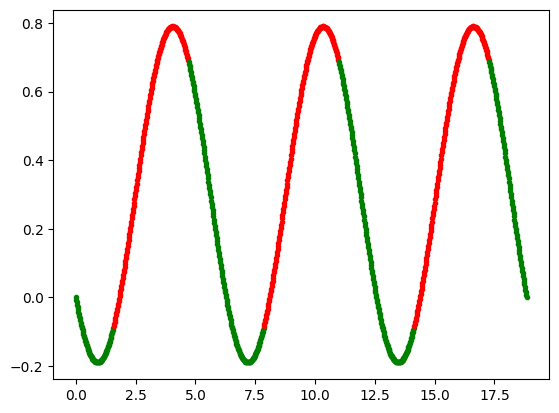

In [10]:
# find the ends points of the non-que balls

# method one:
# for all values of t, find ax and ay. Then find bx and by
# plot t vs bx and t vs by

import numpy as np
from sympy import sqrt
import sympy as sp
import matplotlib.pyplot as plt

h, k, a, b = 2 / 5, 0, 3 / 5, sqrt(5) / 5

for t in np.linspace(0, 6 * np.pi, 1000):
    ax0 = h + a * np.cos(t)
    ay = k + b * np.sin(t)
    for index in [0,1]:
        ax, bx, by, cx, cy = minipool.args[index].subs(ahat_vy, ay)
        if np.abs(ax0-ax) < 1e-5:
            # plt.plot(ax, ay, 'o', color='blue')
            # plt.plot(bx, by, 'o', color='red')
            # plt.plot(cx, cy, 'o', color='green')
            plt.plot(t,bx,'.',color='red' if index==0 else 'green')

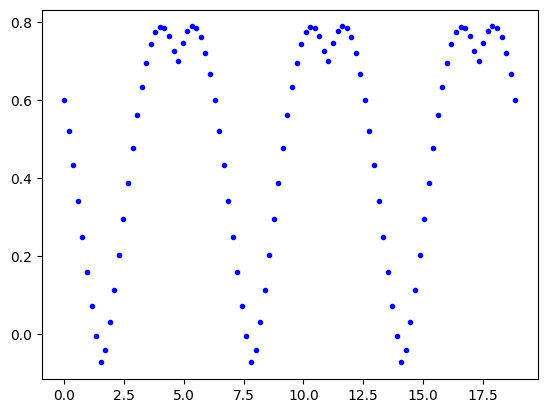

In [25]:
from sympy import sin, symbols
tt = symbols('tt')

f = sp.simplify(minipool.args[0].args[1].subs(ahat_vy, k + b * sin(tt)))


In [32]:
from IPython.display import display

for index in [0,1]:
    f = sp.simplify(minipool.args[index].args[1].subs(ahat_vy, k + b * sin(tt)))
    f_prime = f.diff(tt)
    critical_points = sp.solve(f_prime, tt)
    for cp in critical_points:
        mm = sp.simplify(f.subs(tt, cp))
        display(mm)
        print(float(mm))
    

3*sqrt(2)*sqrt(11 - 4*sqrt(6))/40 + 3*sqrt(6)/40 + sqrt(3)*sqrt(11 - 4*sqrt(6))/10 + 3/10

0.7898979485566356


-3*sqrt(2)*sqrt(4*sqrt(6) + 11)/40 + 3*sqrt(6)/40 + 3/10 + sqrt(3)*sqrt(4*sqrt(6) + 11)/10

0.7898979485566356


-sqrt(3)*sqrt(11 - 4*sqrt(6))/10 - 3*sqrt(6)/40 - 3*sqrt(2)*sqrt(11 - 4*sqrt(6))/40 + 3/10

-0.1898979485566356


-sqrt(3)*sqrt(4*sqrt(6) + 11)/10 - 3*sqrt(6)/40 + 3/10 + 3*sqrt(2)*sqrt(4*sqrt(6) + 11)/40

-0.1898979485566356
